In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'data/FuelConsumption.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [22]:
data.drop(columns=['MODELYEAR','MAKE','MODEL','VEHICLECLASS'],inplace=True)

In [14]:
data['TRANSMISSION'].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [15]:
data['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [ ]:
data.drop(columns=['TRANSMISSION','FUELTYPE'], inplace=True)

In [24]:
data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [25]:
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

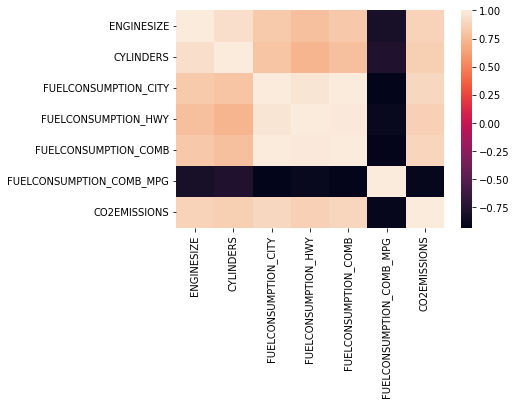

In [28]:
sns.heatmap(data.corr())

<AxesSubplot:>

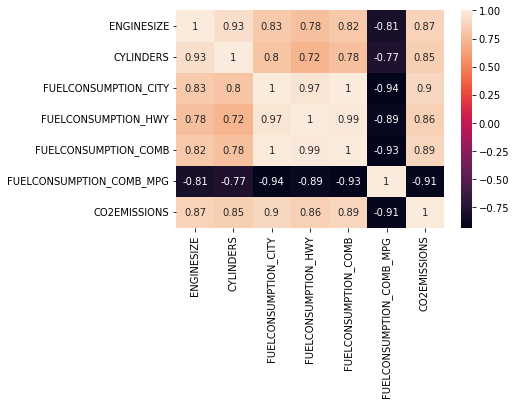

In [29]:
sns.heatmap(data.corr(),annot=True)

In [30]:
data1=data
data.drop(columns=['FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG'],inplace=True)

In [31]:
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

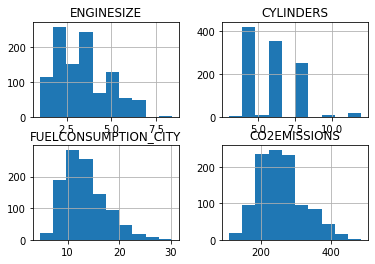

In [34]:
data.hist()

In [35]:
features = data.drop(columns=['CO2EMISSIONS'])
features

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY
0,2.0,4,9.9
1,2.4,4,11.2
2,1.5,4,6.0
3,3.5,6,12.7
4,3.5,6,12.1
...,...,...,...
1062,3.0,6,13.4
1063,3.2,6,13.2
1064,3.0,6,13.4
1065,3.2,6,12.9


In [36]:
target = data['CO2EMISSIONS']
target

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [37]:
#Spliting Train and Test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features,target,test_size=0.25,random_state=42)

In [40]:
xtrain.shape,xtest.shape

((800, 3), (267, 3))

In [41]:
ytrain, ytest

(309     258
 319     212
 261     317
 306     308
 737     301
        ... 
 330     276
 466     230
 121     317
 1044    198
 860     398
 Name: CO2EMISSIONS, Length: 800, dtype: int64,
 732     304
 657     221
 168     294
 86      221
 411     207
        ... 
 110     292
 453     271
 554     306
 700     290
 1022    216
 Name: CO2EMISSIONS, Length: 267, dtype: int64)

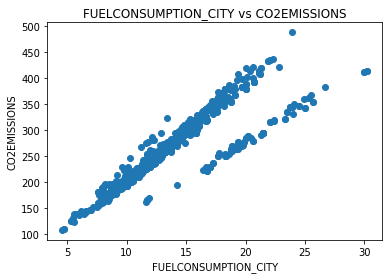

In [51]:
#Choosing Model
plt.scatter(features['FUELCONSUMPTION_CITY'],target.values)
plt.title('FUELCONSUMPTION_CITY vs CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [53]:
#multiple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain.values.ravel())

LinearRegression()

In [54]:
model.intercept_

72.54403355745356

In [55]:
model.coef_

array([11.88512968,  5.58964317,  8.40823898])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
#prediction
ypred = model.predict(xtest)
#Evaluation
print('Absolute Error:', mean_absolute_error(ytest,ypred))
print('Mean Squared Error: ', mean_squared_error(ytest,ypred))
print('R2 Score: ',r2_score(ytest,ypred))

Absolute Error: 17.136657732957914
Mean Squarred Error:  527.4490028894423
R2 Score:  0.8728417699109179


In [80]:
# Cross Validation
from sklearn.model_selection import KFold
COUNT = 0
accuracies = []
folds = KFold(n_splits=5)
for train_index, test_index in folds.split(features):
    COUNT += 1
    # Extracting Training Data
    xtrain = features.iloc[train_index]
    ytrain = target.iloc[train_index]
    #
    xtest = features.iloc[test_index]
    ytest = target.iloc[test_index]
    print()
    # MOdeling
    model = LinearRegression()
    model.fit(xtrain, ytrain)

    # Evaluation
    print('==================='+str(COUNT)+'==================')
    ypred = model.predict(xtest)
    print("Absoulute Error: ", mean_absolute_error(ytest, ypred))
    print("Mean Squarred Error: ", mean_squared_error(ytest, ypred))
    print("R2 Score: ", r2_score(ytest, ypred))
    accuracies.append(r2_score(ytest, ypred))


===================1==================
Absoulute Error:  14.078555998236446
Mean Squarred Error:  389.94053862410004
R2 Score:  0.8862755671210532

===================2==================
Absoulute Error:  24.4560041328973
Mean Squarred Error:  1127.4299414243746
R2 Score:  0.7689948520135101

===================3==================
Absoulute Error:  19.444832254974603
Mean Squarred Error:  717.3735314289811
R2 Score:  0.8186056665121978

===================4==================
Absoulute Error:  15.859065273313641
Mean Squarred Error:  435.3427527658032
R2 Score:  0.8852711218370433

===================5==================
Absoulute Error:  14.454705959453188
Mean Squarred Error:  366.5617498680333
R2 Score:  0.8952183595505572


In [81]:
print("Average R2 Score: ", sum(accuracies)/5)

Average R2 Score:  0.8508731134068723


In [83]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cvmodel = LinearRegression()
cv = cross_val_score(cvmodel, features, target, cv=10)
cv, cv.mean()

(array([0.92026691, 0.84939559, 0.73940185, 0.83232468, 0.81342395,
        0.82255311, 0.88161856, 0.88799364, 0.9137904 , 0.86623948]),
 0.8527008169436309)

In [90]:
# Model Visualization
model2 = LinearRegression()
model2.fit(features[['ENGINESIZE']], target)

LinearRegression()

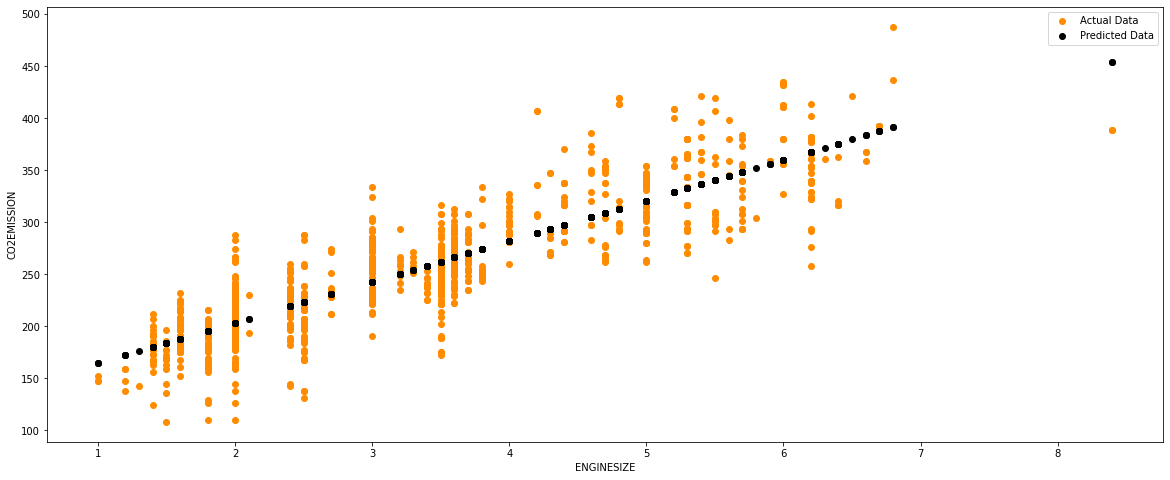

In [91]:
fig = plt.figure(1, figsize=(20,8))
plt.scatter(features[['ENGINESIZE']].values, target.values, label='Actual Data', color='darkorange')
plt.scatter(features[['ENGINESIZE']].values, model2.predict(features[['ENGINESIZE']]), label='Predicted Data', color='black')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.legend()
plt.show()

In [87]:
dummyFeature = np.linspace(0, 10, 400).reshape(-1,1)
#dummyFeature

C:\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


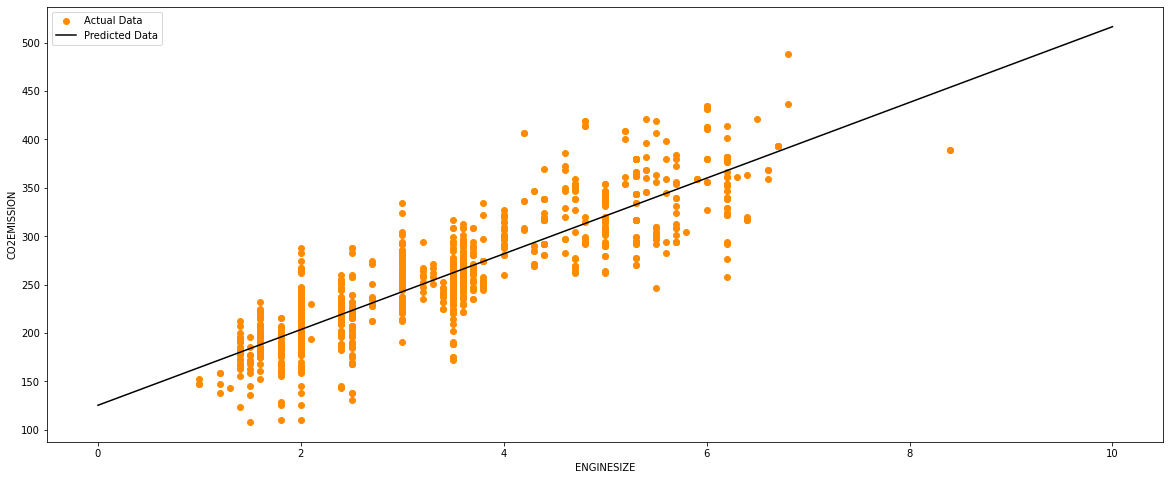

In [92]:
fig = plt.figure(1, figsize=(20,8))
plt.scatter(features[['ENGINESIZE']].values, target.values, label='Actual Data', color='darkorange')
plt.plot(dummyFeature, model2.predict(dummyFeature), label='Predicted Data', color='black')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.legend()
plt.show()

In [93]:
dummyFeature1 = np.linspace(0, 10, 400)
dummyFeature2 = np.linspace(4, 31, 400)
dummyFeature = np.c_[dummyFeature1, dummyFeature2]

C:\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


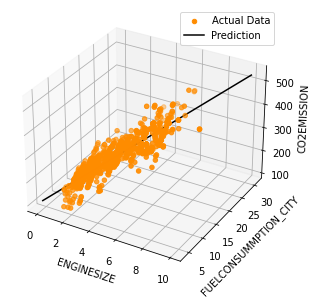

In [96]:
model3 = LinearRegression().fit(
    features[['ENGINESIZE', 'FUELCONSUMPTION_CITY']], target)
fig = plt.figure(1, figsize=(20, 5))
axes = plt.axes(projection='3d')
axes.scatter3D(features[['ENGINESIZE']], features[[
               'FUELCONSUMPTION_CITY']], target, label='Actual Data', color='darkorange')
axes.plot3D(dummyFeature1, dummyFeature2, model3.predict(
    dummyFeature).ravel(), label='Prediction', color='black')
axes.legend()
axes.set_xlabel("ENGINESIZE")
axes.set_ylabel("FUELCONSUMMPTION_CITY")
axes.set_zlabel("CO2EMISSION")
plt.show()

In [101]:
# Saving Model
from joblib import dump
dump(model, 'myModel')

['myModel']

In [102]:
from joblib import load
model = load('myModel')

In [103]:
model.predict(xtest)

array([252.60202976, 200.1301554 , 202.48148066, 182.01161495,
       189.06559075, 332.76212116, 346.87007275, 175.26733894,
       186.24019017, 285.92199666, 278.86802086, 244.52724122,
       251.58121702, 246.0947914 , 250.79744193, 247.66234158,
       252.36499211, 254.09691782, 258.01579326, 257.23201817,
       258.79956835, 244.52724122, 250.79744193, 252.52936764,
       256.44824308, 254.88069291, 256.44824308, 283.09659608,
       265.06976905, 265.06976905, 265.06976905, 265.06976905,
       230.32757622, 236.59777693, 242.17591596, 246.87856649,
       262.24436848, 279.48742042, 245.14664078, 308.92011745,
       301.86614165, 242.01154043, 308.92011745, 230.32757622,
       236.59777693, 242.17591596, 246.87856649, 256.75794286,
       258.32549304, 254.55194184, 256.9032671 , 302.64991674,
       254.55194184, 304.21746692, 305.00124201, 327.5127332 ,
       317.32365705, 331.43160864, 321.2425325 , 244.36286569,
       270.08211936, 316.32484957, 240.44399025, 264.59